In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pylab as plt
from easydict import EasyDict as edict
import pint


Taking a look at How Diane Arcay set up the crust non-newtonia creep in her models.

The 2012 and 2017 papers have the creep form: 



$$\eta(\epsilon, T, p) = A_0 \exp \left(\frac{E + pV}{nRT}  \right) (\dot \epsilon)^{\frac{1}{n} - 1}  $$


This also means we can write $A_0 = B_0^\frac{1}{n}$

Where B is the pre-exp form in Christenson (1986), Garel (2014), takes its inverse

In [2]:
u = pint.UnitRegistry()
cmpery = 1*u.cm/u.year
mpermy = 1*u.m/u.megayear
mps = 1*u.m/u.s  #scalar multiplication is necessary to turn these into pint 'quantities'

In [3]:
#mantle dislocation, params from Garel
Ads = 5e-16
Eds= 5.4e5
Epr = 5.4e5
Vds = 12e-6
n=3.5

##mantle and crust dislocation, params from Arcay

Af = 339428.7 
Ef0 = 4.65e5
Ef = 3.1e5
Vf = 1.7e-5
nf = 3

#Diffusion Creep in Agrusta 2017

Edf=3e5
Vdf=5e-6
#Adf=3e-11
Adf=5.34e-10 

#other
g = 9.8
dens = 3300.
R = 8.314
SR = 5e-14
fc = 0.05
C = 1e6

In [4]:
#1./1.87e9

In [5]:
(1/Af**nf),Ads , (1/Af**nf)/Ads 

(2.5571388923365423e-17, 5e-16, 0.051142777846730846)

## Temp profile fault

In [6]:
Depths = np.linspace(0,200e3,100)

Temps = 500*(Depths/50e3) + 273
Temps2 = 500*(Depths/100e3) + 273


Pressures = Depths*3300.*9.8


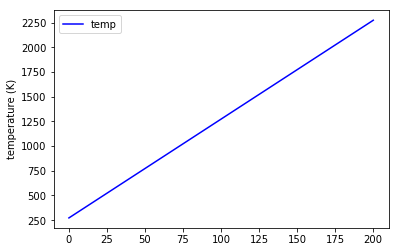

In [7]:
fig, ax1 = plt.subplots()#plt.plot(depths, Temps)



ax1.plot(Depths/1e3, Temps, color='b', label='temp')
ax1.set_ylabel('temperature (K)')



ax1.legend( loc = 2)

plt.show()

In [8]:
def creep(A, E, V, ps, ts):
    c = (1/A)*np.exp( ((E + V*ps))/((R*ts)))
    return c

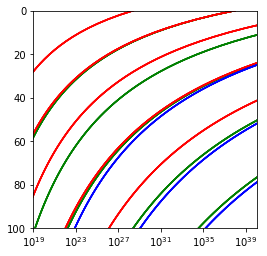

In [9]:
fig, axes = plt.subplots(figsize = (4, 4))

for i in [0.01, 0.1, 1., 10, 100.0]:
    for j in [0.5, 0.75, 1., 1.5, 2.0]:
            d = creep(1*Adf, j*Edf, 1*Vdf, Pressures, Temps)
            axes.plot(d, Depths/1e3, c='g', label = 'garel mantle')


for i in [0.01, 0.1, 1., 10, 100.0]:
    for j in [0.5, 0.75, 1., 1.5, 2.0]:
            d = creep(1*Adf, j*Edf, 1*Vdf, Pressures, 1.5*Temps)
            axes.plot(d, Depths/1e3, c='r', label = 'garel mantle')
            
for i in [0.01, 0.1, 1., 10, 100.0]:
    for j in [0.5, 0.75, 1., 1.5, 2.0]:
            d = creep(1*Adf, j*Edf, 1*Vdf, Pressures, 0.5*Temps)
            axes.plot(d, Depths/1e3, c='b', label = 'garel mantle')
            
axes.set_ylim(100,0)

axes.set_xlim(1e19, 1e40)

axes.set_xscale('log')

### Plot the diffusion and dislocation creep values 


In [10]:
1/5e-3, 1/5e-8 == 2e7, 5/5e-4 == 1e4

(200.0, True, True)

In [11]:
ds = (1./Ads**(1./n))*(SR**((1.-n)/n))*np.exp( ((Eds + Vds*Pressures))/((n*R*Temps)))
ds2 = (10/Ads**(1./n))*(SR**((1.-n)/n))*np.exp( ((Ef + Vf*Pressures))/((n*R*Temps)))


df = (1/Adf)*np.exp( ((Edf + Vdf*Pressures))/((R*Temps)))
df2 = (5e-3/Adf)*np.exp( ((0.5*Edf + 10.*Vdf*Pressures))/((R*Temps)))
#df2 = (5e-8/Adf)*np.exp( ((0.5*Edf + 10.*Vdf*Pressures))/((R*Temps)))
#df2_ = (5e-3/Adf)*np.exp( ((0.4*Edf + 3.*Vdf*Pressures))/((R*Temps2)))
df2_ = (5e-3/Adf)*np.exp( ((0.4*Edf + 5.*Vdf*Pressures))/((R*Temps2)))



dsF0 = (Af)*np.exp( ((Ef0 + Vf*Pressures))/((nf*R*Temps)))*(SR**((1./nf) - 1))
dsF = (Af)*np.exp( ((Ef + Vf*Pressures))/((nf*R*Temps)))*(SR**((1./nf) - 1))



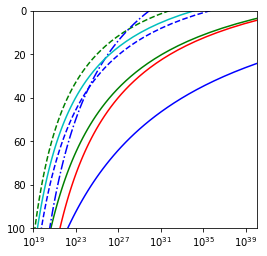

In [12]:
fig, axes = plt.subplots(figsize = (4, 4))


axes.plot(ds, Depths/1e3, c='g', label = 'garel mantle')
axes.plot(ds2, Depths/1e3, c='g',ls = '--', label = 'garel crust')

axes.plot(df, Depths/1e3, c='b',ls = '-', label = 'Agrusta mantle')
axes.plot(df2, Depths/1e3, c='b',ls = '--', label = 'Agrusta crust')
axes.plot(df2_, Depths/1e3, c='b',ls = '-.', label = 'Agrusta crust2')



axes.plot(dsF0, Depths/1e3, c='r', label = 'arcay mantle')
axes.plot(dsF, Depths/1e3, c='c', label = 'arcay crust')
#axes.plot(dsF2, Depths/1e3, c='k', label = 'arcay crust')


axes.set_ylim(100,0)

axes.set_xlim(1e19, 1e40)

axes.set_xscale('log')

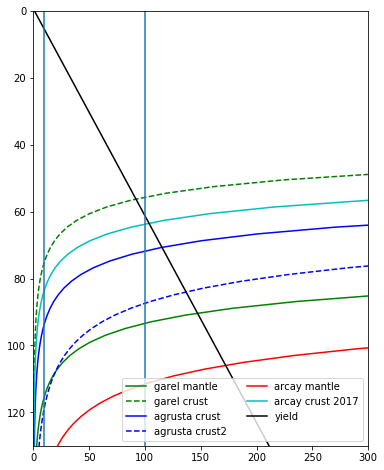

In [13]:
fig, axes = plt.subplots(figsize = (6, 8))


axes.plot((2*SR*ds)/1e6, Depths/1e3, c='g', label = 'garel mantle')
axes.plot((2*SR*ds2)/1e6, Depths/1e3, c='g', ls = '--', label = 'garel crust')


axes.plot((2*SR*df2)/1e6, Depths/1e3, c='b', label = 'agrusta crust')
axes.plot((2*SR*df2_)/1e6, Depths/1e3, c='b',ls = '--', label = 'agrusta crust2')



axes.plot((2*SR*dsF0)/1e6, Depths/1e3, c='r', label = 'arcay mantle')
axes.plot((2*SR*dsF)/1e6, Depths/1e3, c='c', label = 'arcay crust 2017')


axes.plot((C+ fc*Pressures)/1e6, Depths/1e3, c='k', label = 'yield')

axes.axvline((2*SR*1e20)/1e6, 0., 80)
axes.axvline((2*SR*1e21)/1e6, 0., 80)
axes.axvline((2*SR*4e21)/1e6, 0., 80)

axes.axvline((2*SR*1e22)/1e6, 0., 80)





axes.set_ylim(130,0)

axes.set_xlim(0, 300)

#axes.set_xscale('log')
axes.legend(loc=4, ncol=2)

## Extra

In [14]:
dips = np.deg2rad(np.linspace(10,70,100))

In [27]:
fac = 0.2
zr = np.sin(fac*dips)/dips**2

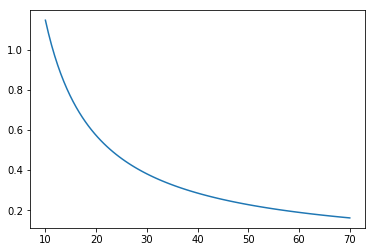

In [28]:
plt.plot(np.rad2deg(dips), zr)